# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [155]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [156]:
# Read in the data set
path = "ames.csv"
df = pd.read_csv("ames.csv")

print("Preview of the data:")
display(df.head())
print("\nColumns:", list(df.columns))
print("Shape:", df.shape) 

Preview of the data:


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900



Columns: ['Year_Built', 'Year_Remod_Add', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'Sale_Price']
Shape: (2930, 14)


In [157]:
# Clean and pre-process the data if neccessary
df = df.dropna()  
df = df.select_dtypes(include=[np.number]) 


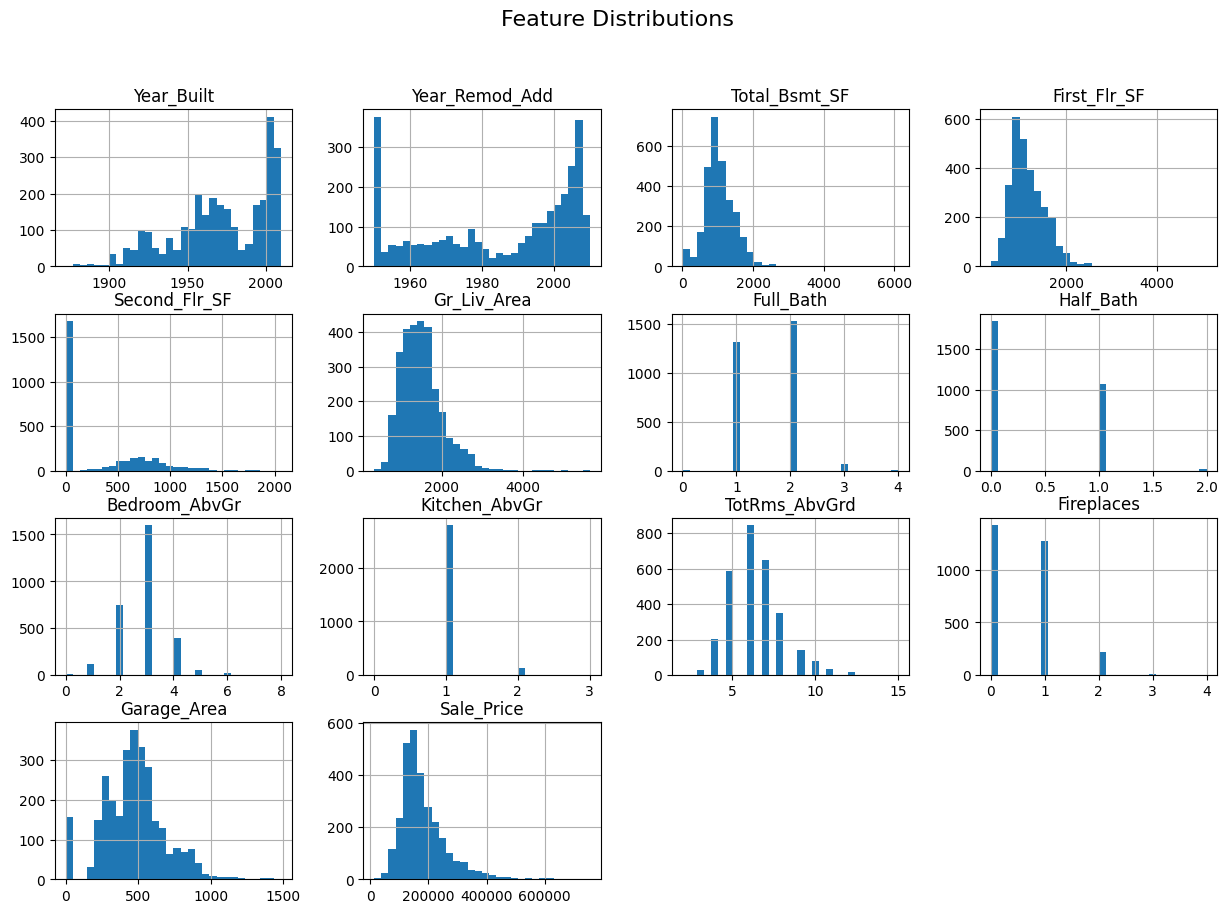

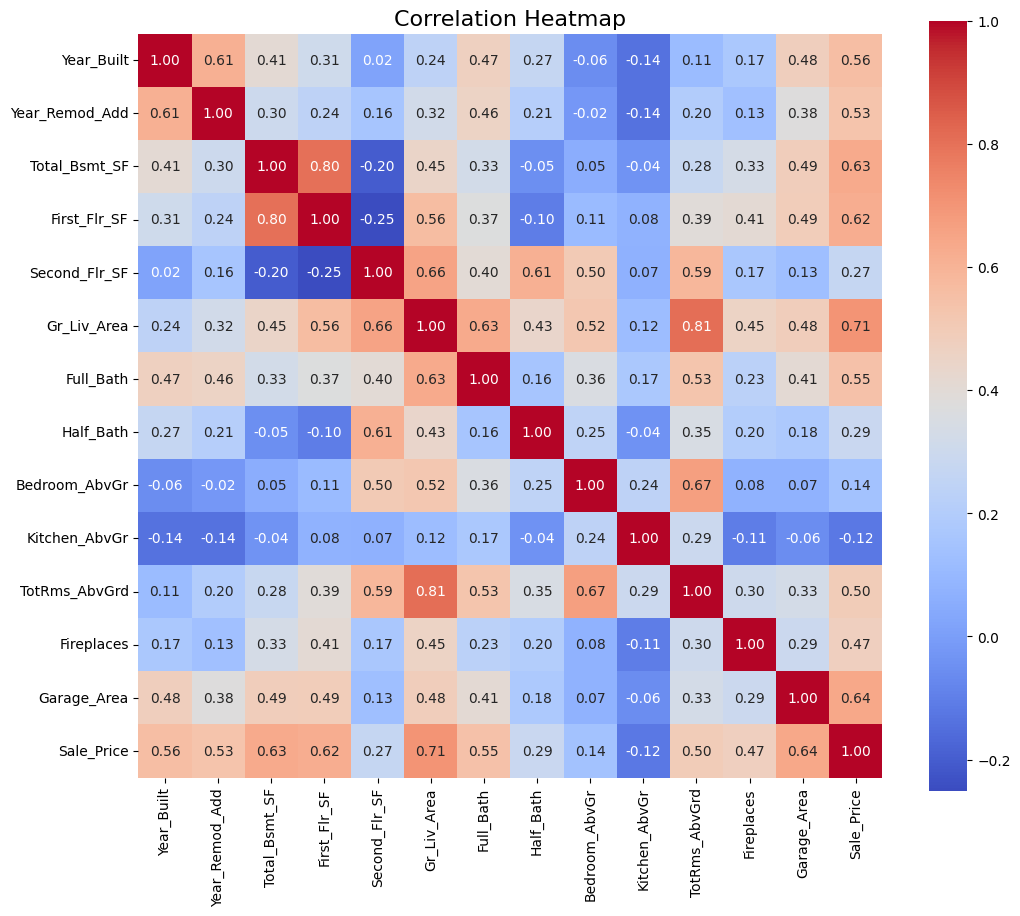

In [158]:
# Explore the data with visualisations such as histograms and correlation matrices
# Histogram for numeric features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()





In [159]:
# Split the independent variables from the dependent variable
y = df["Sale_Price"]
X = df.drop(columns=["Sale_Price"])

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (2930, 13)
Shape of y (target): (2930,)



Correlation with SalePrice:


Sale_Price        1.000000
Gr_Liv_Area       0.706780
Garage_Area       0.640138
Total_Bsmt_SF     0.632529
First_Flr_SF      0.621676
Year_Built        0.558426
Full_Bath         0.545604
Year_Remod_Add    0.532974
TotRms_AbvGrd     0.495474
Fireplaces        0.474558
Half_Bath         0.285056
Second_Flr_SF     0.269373
Bedroom_AbvGr     0.143913
Kitchen_AbvGr    -0.119814
Name: Sale_Price, dtype: float64

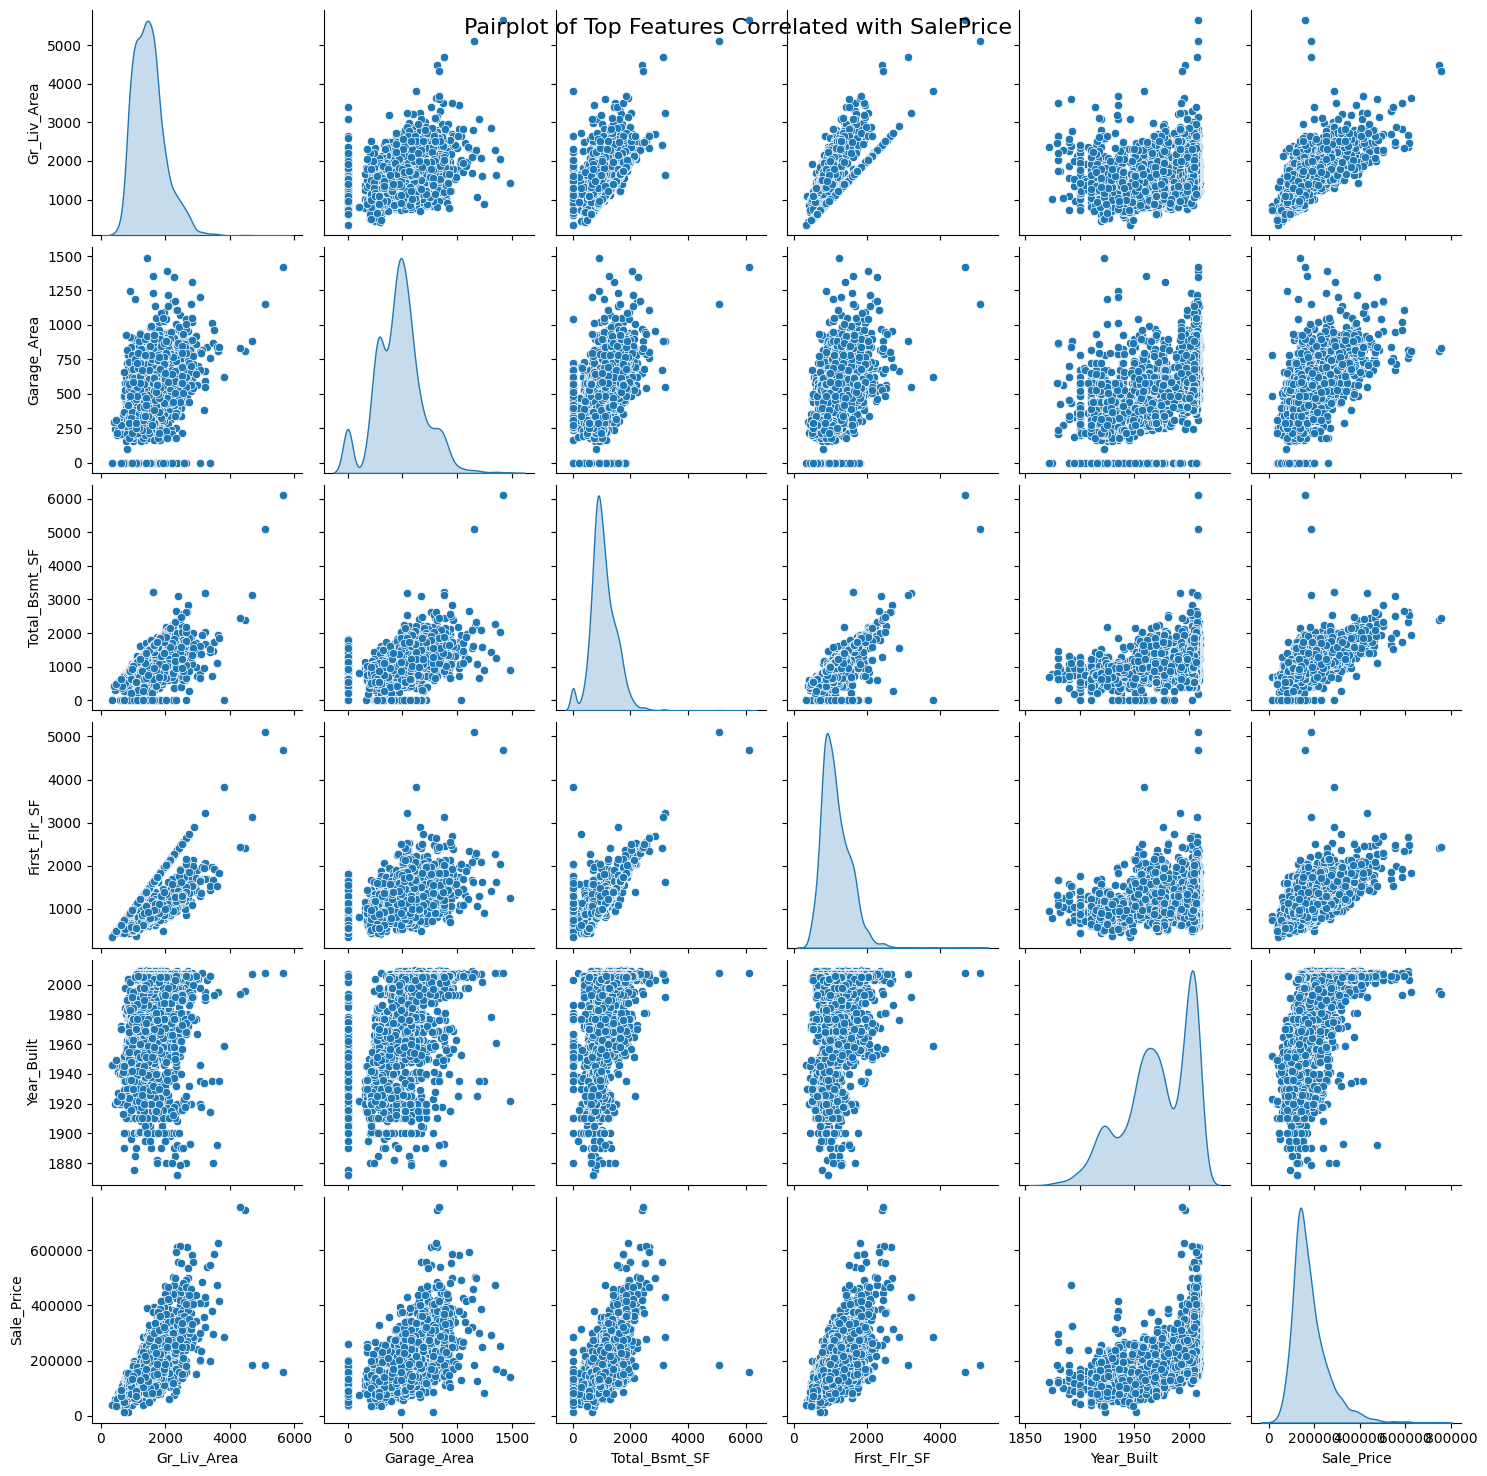

In [160]:
# Explore relationships between the independent and dependent variables
# Correlation with target variable 'SalePrice'
target = "Sale_Price"
target_corr = corr["Sale_Price"].sort_values(ascending=False)
print("\nCorrelation with SalePrice:")
display(target_corr)

# Pick top 5 correlated features with SalePrice
top_features = target_corr.index[1:6].tolist() + [target]  # Exclude 'Sale_Price' itself
sns.pairplot(df[top_features], diag_kind='kde')
plt.suptitle("Pairplot of Top Features Correlated with SalePrice", fontsize=16)
plt.show()


In [161]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (2197, 13), Test set shape: (733, 13)


In [162]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [163]:
# Print the model intercept and coefficients
print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)

# Match coefficients to feature names
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef_df)

# Predict on the test set and compute R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared on test set: {r2:.4f}")

# Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Root Mean Squared Error (RMSE) on test set: {rmse:.2f}")



Model Intercept: -5059.448195610399
Model Coefficients: [ 78.69286848 141.14571761]
       Feature  Coefficient
0  Gr_Liv_Area    78.692868
1  Garage_Area   141.145718

R-squared on test set: 0.6386
Root Mean Squared Error (RMSE) on test set: 51326.13


In [164]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Preview first 10 predictions vs actual values
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nFirst 10 Predictions vs Actual Values:")
display(pred_df.head(10))




First 10 Predictions vs Actual Values:


,Actual,Predicted
1357,161000,158224.094309
2367,116000,113256.675789
2822,196500,217552.819113
2126,123600,72846.491601
1544,126000,94782.712872
2415,174190,159556.516829
2227,200000,147050.447918
410,148500,171621.484061
761,88750,81392.389089
436,409900,283579.839647


In [165]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared on test set: {r2:.4f}")
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Root Mean Squared Error (RMSE) on test set: {rmse:.2f}")





R-squared on test set: 0.6386
Root Mean Squared Error (RMSE) on test set: 51326.13


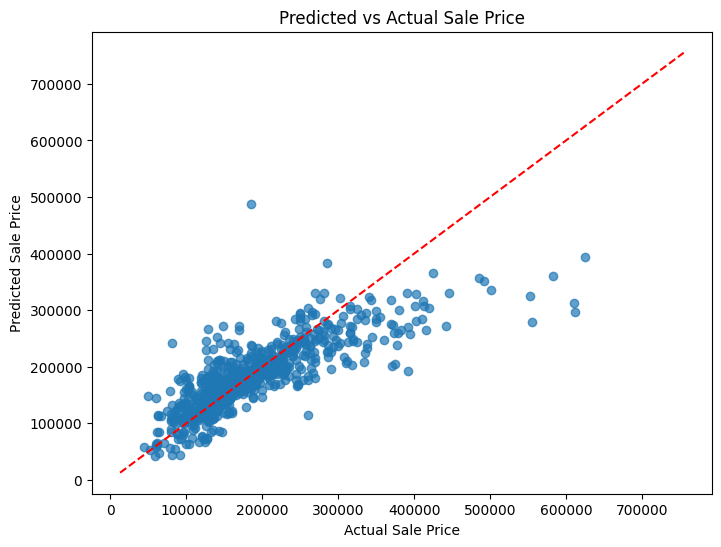

In [166]:
# Generate a plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual Sale Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.show()

In [167]:
# Print the coefficients
print("\nModel Intercept:", model.intercept_)

# Coefficients for each feature
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef}")


Model Intercept: -5059.448195610399
Coefficient for Gr_Liv_Area: 78.69286848121402
Coefficient for Garage_Area: 141.1457176087722


**Interpret coefficients in the context of the prediction:**
- The intercept means that when both living area (Gr_Liv_Area) and garage size (Garage_Area) are zero the predicted sale price would be about -$5,059. Negative prices don't make sense in reality but this value works as a baseline in the regression equation. 
- The coefficient for Gr_Liv_Area (~78.7) shows that for every additional square foot about ground living space, the predicted sale price increases by about $79, with the assumption that garage size remains constant. 
- The coefficient for Garage_Area (~141.1) suggests that for every additional square foot of garage space, the predicted sale price increases by about $141, assuming living area remains constant. 
- Coefficients are positive, meaning that larger living areas and larger garages are associated with higher sale prices 
- The model makes reasonable predictions for many properties, with predicted prices close to the actual sale prices. 
- However, it undervalues mid-range homes, and over or under predicts small or luxury homes since it only considers size and garage. 

**Summarise findings**

This multiple linear regression model demonstrates that both living area and garage size are significant positive predictors of house prices. 
The results confirm that larger homes and garages generally sell for more, with garage space having a stronger marginal space than living space. 
While the model provides a useful baseline and gives many reasonable estimates it struggles with mid-range and luxury properties because it only considers two features. 
This shows the need to incorporate additional variables such as overall quality, neighborhood, etc. to better capture the complexity of housing prices. 